(array([1.000e+00, 4.000e+00, 8.000e+00, 1.400e+01, 3.200e+01, 6.700e+01,
       1.120e+02, 1.900e+02, 3.040e+02, 4.350e+02, 8.830e+02, 8.200e+02,
       9.410e+02, 1.031e+03, 1.070e+03, 9.740e+02, 8.410e+02, 6.690e+02,
       5.810e+02, 3.870e+02, 3.200e+02, 1.350e+02, 9.600e+01, 4.200e+01,
       2.500e+01, 9.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]), array([-32. , -22.7, -13.4,  -4.1,   5.2,  14.5,  23.8,  33.1,  42.4,
        51.7,  61. ,  70.3,  79.6,  88.9,  98.2, 107.5, 116.8, 126.1,
       135.4, 144.7, 154. , 163.3, 172.6, 181.9, 191.2, 200.5, 209.8,
       219.1, 228.4, 237.7, 247. ]), <a list of 30 Patch objects>)
[-27.35 -18.05  -8.75   0.55   9.85  19.15  28.45  37.75  47.05  56.35
  65.65  74.95  84.25  93.55 102.85 112.15 121.45 130.75 140.05 149.35
 158.65 167.95 177.25 186.55 195.85 205.15 214.45 223.75 233.05 242.35]
[1058.97397194   35.2658967 ] [[536.90502723 -11.92020192]
 [-11.92020192   0.79393538]]


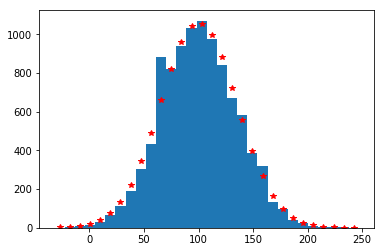

In [17]:
import numpy as np
import matplotlib.pyplot as plt
N = 10000
M = 100
dM = 3
students1 = np.full(N, M)
students2 = np.full(N, M)
    
def play_a(array, dm):
    a = np.random.randint(0, len(array))
    b = np.random.randint(0, len(array))
    
    a_hand = np.random.randint(0, 3)
    b_hand = np.random.randint(0, 3)
    
    if a_hand == 0 and b_hand == 2:
        array[a] += dm
        array[b] -= dm
        
    elif b_hand == 0 and a_hand == 2:
        array[a] -= dm
        array[b] += dm
    
    elif a_hand > b_hand:  
        array[a] += dm
        array[b] -= dm
        
    elif a_hand < b_hand:
        array[a] -= dm
        array[b] += dm
    else :
        pass
    
    return array

def play_b(array, dm):
    a = np.random.randint(0, len(array))
    b = np.random.randint(0, len(array))
    if array[a] <= 0 or array[b] <= 0:
        pass
    else :
        a_hand = np.random.randint(0, 3)
        b_hand = np.random.randint(0, 3)
    
        if a_hand == 0 and b_hand == 2:
            array[a] += dm
            array[b] -= dm
        
        elif b_hand == 0 and a_hand == 2:
            array[a] -= dm
            array[b] += dm
    
        elif a_hand > b_hand:  
            array[a] += dm
            array[b] -= dm
        
        elif a_hand < b_hand:
            array[a] -= dm
            array[b] += dm
        else :
            pass
    
    
    return array

for _ in range(1000000):
    students1 = play_a(students1, dM)
    students2 = play_b(students2, dM)

a=plt.hist(students1, bins = 30, label = "Liability")

print(a)
dx=(a[1][1]-a[1][0])
bin_center=np.array(a[1][0:-1])+dx/2
print(bin_center)

from scipy import optimize
def test_func(x,amp,s):
    return amp*np.exp(-(x-100)**2/(2*s**2))

params,params_covariance=optimize.curve_fit(test_func,bin_center,a[0])
print(params,params_covariance)
plt.plot(bin_center,test_func(bin_center,params[0],params[1]),'r*',label='Fitted Function')
plt.show()